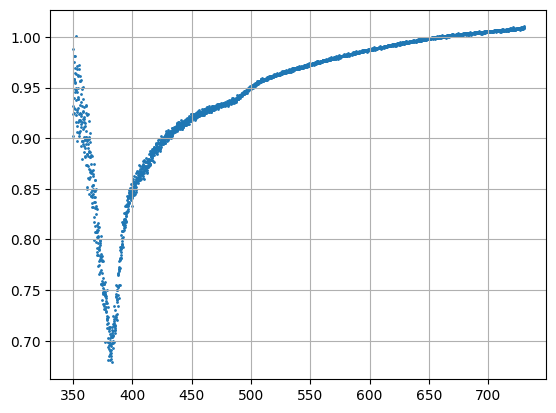

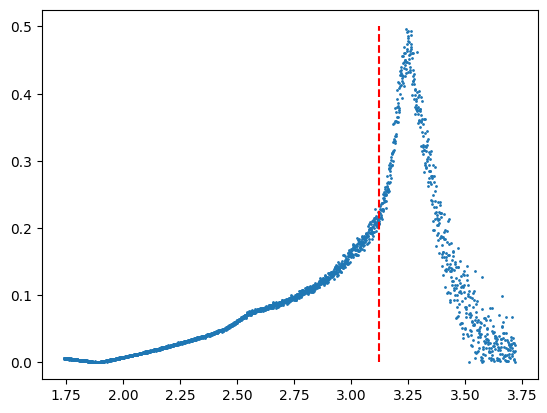

In [18]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("lampara_estandar.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("lampara_muestra.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("Dark.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<730)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()

from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)



y = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y, s=1 )
plt.plot([3.12, 3.12], [0, 0.5], "r--")
plt.show()

## REGRESIÓN LINEAL

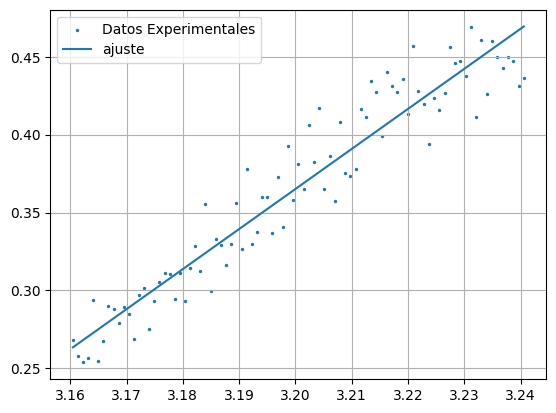

-3.057971358466813


In [36]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y == np.max(y))[0][0]]

mask_lin = (x>3.16) & (x<x_max)

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.legend()
plt.grid()
plt.show()

print(intercept/(slope))



### Gráfica de residuos:

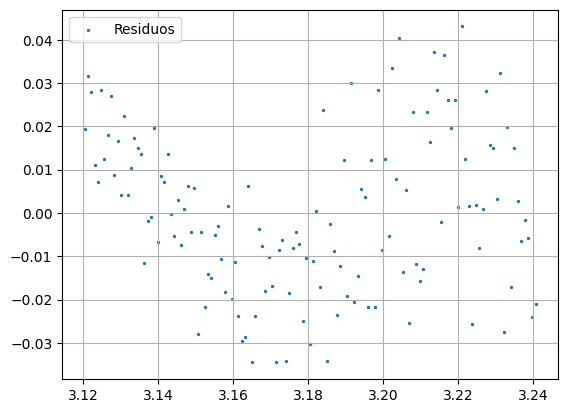

In [35]:
plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()
plt.show()



## ANÁLISIS CON PEROVSKITA

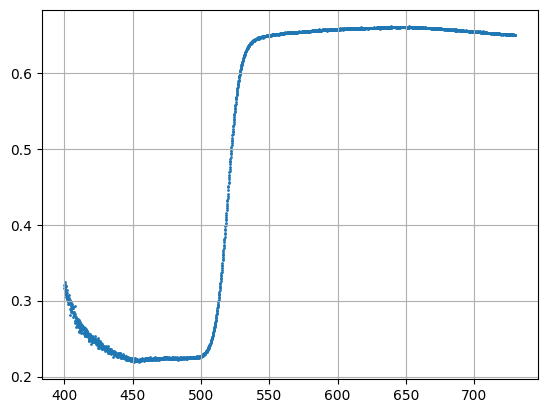

[1.66920724 1.66947324 1.66973946 ... 3.85120489 3.85249329 3.85378255]


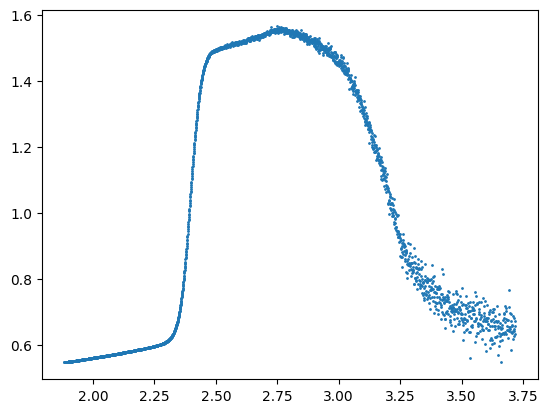

In [ ]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("lampara_estandar_sin_perovskita.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("lampara_estandar_con_perovskita.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("Dark_perovskita.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>400) & (longitud_onda<730)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()

from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = h*c / longitud_onda / e * 1e9
x = np.flip(x)
print(x)


y = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y, s=1 )
plt.show()